In [1]:
!pip install torch torchvision torchaudio datasets transformers scikit-learn numpy matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/Week05')
from idlmam import *

Mounted at /content/drive


/content/drive/MyDrive/Colab Notebooks/Week05/idlmam.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import torch.nn as nn
from torch.utils.data import *
from idlmam import *
import torch


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from datasets import load_dataset
from sklearn.preprocessing import LabelEncoder
from transformers import AutoTokenizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix


In [5]:
import torch
import unicodedata
import string
from torch.utils.data import Dataset, DataLoader
from datasets import load_dataset
from sklearn.preprocessing import LabelEncoder

# Load emotion dataset
dataset = load_dataset("emotion")

# Define vocabulary (all unique characters)
all_letters = string.ascii_letters + " .,;!?'-"  # Add punctuation for better text representation
n_letters = len(all_letters)

# Character to index mapping
alphabet = {char: idx for idx, char in enumerate(all_letters)}

# Normalize text (remove accents)
def unicodeToAscii(s):
#Turns a Unicode string into plain ASCII
  return ''.join(
    c for c in unicodedata.normalize('NFD', s)
    if unicodedata.category(c) != 'Mn'
    and c in all_letters
)

# Encode labels
encoder = LabelEncoder()
dataset_labels = dataset["train"]["label"] + dataset["test"]["label"]
encoder.fit(dataset_labels)  # makes a mapping of labels to unique numbers for encoding


class EmotionTextDataset(Dataset):
    def __init__(self, text_data, label_data, vocabulary):
        self.texts = [unicodeToAscii(text).lower() for text in text_data]  # Normalize all texts
        self.labels = encoder.transform(label_data)  # Convert labels to numbers (for encoding)
        self.vocabulary = vocabulary

    def __len__(self):
        return len(self.texts)

    def string2InputVec(self, text):
        """Convert text into a sequence of indices based on vocabulary."""
        T = len(text)
        text_vec = torch.zeros((T), dtype=torch.long)
        for pos, char in enumerate(text):
            text_vec[pos] = self.vocabulary.get(char, 0)  # Default to 0 if char not in vocab
        return text_vec

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        label_vec = torch.tensor(label, dtype=torch.long)  # Convert label to tensor
        return self.string2InputVec(text), label_vec

# Create dataset instances
train_dataset = EmotionTextDataset(dataset["train"]["text"], dataset["train"]["label"], alphabet)
test_dataset = EmotionTextDataset(dataset["test"]["text"], dataset["test"]["label"], alphabet)

# Split into training/testing DataLoader
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [6]:
class LastTimeStep(nn.Module):
    """
    A class for extracting the hidden activations of the last time step following
    the output of a PyTorch RNN module.
    """
    def __init__(self, rnn_layers=1, bidirectional=False):
        super(LastTimeStep, self).__init__()
        self.rnn_layers = rnn_layers
        if bidirectional:
            self.num_driections = 2
        else:
            self.num_driections = 1

    def forward(self, input):
        #Result is either a tupe (out, h_t)
        #or a tuple (out, (h_t, c_t))
        rnn_output = input[0]
        last_step = input[1] #this will be h_t
        if(type(last_step) == tuple):#unless it's a tuple,
            last_step = last_step[0]#then h_t is the first item in the tuple

        batch_size = last_step.shape[1] #per docs, shape is: '(num_layers * num_directions, batch, hidden_size)'
        #reshaping so that everything is separate
        last_step = last_step.view(self.rnn_layers, self.num_driections, batch_size, -1)
        #We want the last layer's results
        last_step = last_step[self.rnn_layers-1]
        #Re order so batch comes first
        last_step = last_step.permute(1, 0, 2)

        #Finally, flatten the last two dimensions into one
        return last_step.reshape(batch_size, -1)


In [15]:
print(len(encoder.classes_))

6


In [17]:

vocab_size = len(all_letters)  # Vocabulary size
classes = len(encoder.classes_) # Number of emotion classes
if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

  # Hyperparameters for training
learning_rate = 0.001  # Define your own learning rate
num_epochs = 30  # Number of epochs for training
num_layers = 3
hidden_nodes = 128  # Number of hidden nodes
D = 64 #Batch size
bidirectional = True

# Define the model architecture
a_rnn = nn.Sequential(
    nn.Embedding(vocab_size, D),  # (B, T) -> (B, T, D)
    nn.RNN(D, hidden_nodes, num_layers = 3, batch_first=True,bidirectional = True, dropout=0.2),  # (B, T, D) -> (B, T, D), (S, B, D)
    LastTimeStep(rnn_layers = 3,bidirectional = True),  # Reduce to (B, D)
    nn.Linear(hidden_nodes*2, classes),  # (B, D) -> (B, classes)
)



# Loss function
checkpoint_path = 'checkpoint.pth'
loss_func = nn.CrossEntropyLoss()
train_rnn = train_simple_network(a_rnn, loss_func, \
                                    train_loader, \
                                    test_loader=test_loader, \
                                    score_funcs={'Accuracy': \
                                                 accuracy_score}, \
                                    device=device, epochs=num_epochs, lr = learning_rate)
torch.save(a_rnn.state_dict(), 'twelevemodel.pth')
weights_only=True


Epoch:   0%|          | 0/30 [00:00<?, ?it/s]

Training:   0%|          | 0/16000 [00:00<?, ?it/s]

Testing:   0%|          | 0/2000 [00:00<?, ?it/s]

Training:   0%|          | 0/16000 [00:00<?, ?it/s]

Testing:   0%|          | 0/2000 [00:00<?, ?it/s]

Training:   0%|          | 0/16000 [00:00<?, ?it/s]

Testing:   0%|          | 0/2000 [00:00<?, ?it/s]

Training:   0%|          | 0/16000 [00:00<?, ?it/s]

Testing:   0%|          | 0/2000 [00:00<?, ?it/s]

Training:   0%|          | 0/16000 [00:00<?, ?it/s]

Testing:   0%|          | 0/2000 [00:00<?, ?it/s]

Training:   0%|          | 0/16000 [00:00<?, ?it/s]

Testing:   0%|          | 0/2000 [00:00<?, ?it/s]

Training:   0%|          | 0/16000 [00:00<?, ?it/s]

Testing:   0%|          | 0/2000 [00:00<?, ?it/s]

Training:   0%|          | 0/16000 [00:00<?, ?it/s]

Testing:   0%|          | 0/2000 [00:00<?, ?it/s]

Training:   0%|          | 0/16000 [00:00<?, ?it/s]

Testing:   0%|          | 0/2000 [00:00<?, ?it/s]

Training:   0%|          | 0/16000 [00:00<?, ?it/s]

Testing:   0%|          | 0/2000 [00:00<?, ?it/s]

Training:   0%|          | 0/16000 [00:00<?, ?it/s]

Testing:   0%|          | 0/2000 [00:00<?, ?it/s]

Training:   0%|          | 0/16000 [00:00<?, ?it/s]

Testing:   0%|          | 0/2000 [00:00<?, ?it/s]

Training:   0%|          | 0/16000 [00:00<?, ?it/s]

Testing:   0%|          | 0/2000 [00:00<?, ?it/s]

Training:   0%|          | 0/16000 [00:00<?, ?it/s]

Testing:   0%|          | 0/2000 [00:00<?, ?it/s]

Training:   0%|          | 0/16000 [00:00<?, ?it/s]

Testing:   0%|          | 0/2000 [00:00<?, ?it/s]

Training:   0%|          | 0/16000 [00:00<?, ?it/s]

Testing:   0%|          | 0/2000 [00:00<?, ?it/s]

Training:   0%|          | 0/16000 [00:00<?, ?it/s]

Testing:   0%|          | 0/2000 [00:00<?, ?it/s]

Training:   0%|          | 0/16000 [00:00<?, ?it/s]

Testing:   0%|          | 0/2000 [00:00<?, ?it/s]

Training:   0%|          | 0/16000 [00:00<?, ?it/s]

Testing:   0%|          | 0/2000 [00:00<?, ?it/s]

Training:   0%|          | 0/16000 [00:00<?, ?it/s]

Testing:   0%|          | 0/2000 [00:00<?, ?it/s]

Training:   0%|          | 0/16000 [00:00<?, ?it/s]

Testing:   0%|          | 0/2000 [00:00<?, ?it/s]

Training:   0%|          | 0/16000 [00:00<?, ?it/s]

Testing:   0%|          | 0/2000 [00:00<?, ?it/s]

Training:   0%|          | 0/16000 [00:00<?, ?it/s]

Testing:   0%|          | 0/2000 [00:00<?, ?it/s]

Training:   0%|          | 0/16000 [00:00<?, ?it/s]

Testing:   0%|          | 0/2000 [00:00<?, ?it/s]

Training:   0%|          | 0/16000 [00:00<?, ?it/s]

Testing:   0%|          | 0/2000 [00:00<?, ?it/s]

Training:   0%|          | 0/16000 [00:00<?, ?it/s]

Testing:   0%|          | 0/2000 [00:00<?, ?it/s]

Training:   0%|          | 0/16000 [00:00<?, ?it/s]

Testing:   0%|          | 0/2000 [00:00<?, ?it/s]

Training:   0%|          | 0/16000 [00:00<?, ?it/s]

Testing:   0%|          | 0/2000 [00:00<?, ?it/s]

Training:   0%|          | 0/16000 [00:00<?, ?it/s]

Testing:   0%|          | 0/2000 [00:00<?, ?it/s]

Training:   0%|          | 0/16000 [00:00<?, ?it/s]

Testing:   0%|          | 0/2000 [00:00<?, ?it/s]

In [13]:
torch.save(a_rnn.state_dict(), 'twelevemodel.pth')
from google.colab import files
files.download('twelevemodel.pth')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='total time', ylabel='test Accuracy'>

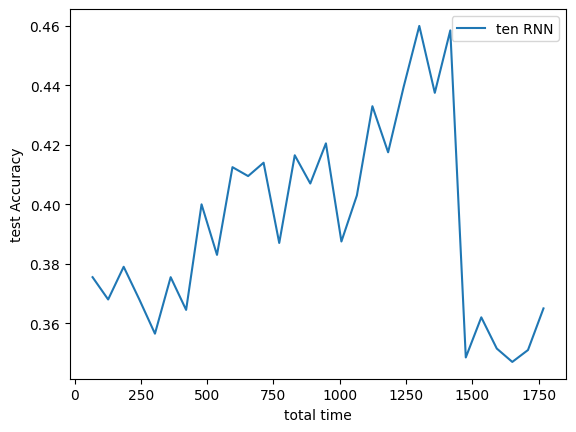

In [16]:
sns.lineplot(x='total time', y='test Accuracy', data=train_rnn, label='ten RNN')


<Axes: xlabel='epoch', ylabel='test Accuracy'>

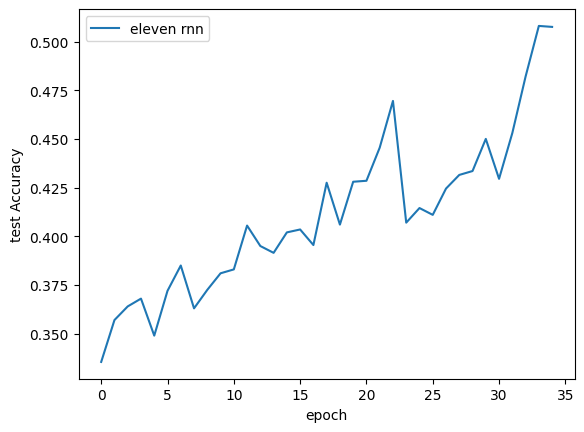

In [9]:
sns.lineplot(x='epoch', y='test Accuracy', data=train_rnn, \
             label='eleven rnn')

In [10]:
weights_only=True
a_rnn.load_state_dict(torch.load('twelevemodel.pth'))
a_rnn.to(device)  # Move model to the correct device (GPU or CPU)
a_rnn.eval()  # Set the model to evaluation mode

# Evaluate model function
def evaluate_model(model, data_loader):
    model.eval()
    correct, total = 0, 0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for input_ids, labels in data_loader:  # Assuming data_loader gives input_ids and labels
            input_ids, labels = input_ids.to(device), labels.to(device)

            # Forward pass
            outputs = model(input_ids)  # (B, classes)

            # Get predicted class (argmax)
            preds = torch.argmax(outputs, dim=1)

            # Track accuracy
            correct += (preds == labels).sum().item()
            total += labels.size(0)

            # Collect predictions and labels
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = correct / total
    return accuracy, all_preds, all_labels

# Evaluate on test data
test_accuracy, y_pred, y_true = evaluate_model(a_rnn, test_loader)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Fix TypeError: Convert NumPy array to Python list
target_names = [str(label) for label in encoder.classes_]

# Print classification report with proper labels
print(classification_report(y_true, y_pred, target_names=target_names))


<ipython-input-10-53116b565a93>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  a_rnn.load_state_dict(torch.load('twelevemodel.pth'))


Test Accuracy: 0.5075
              precision    recall  f1-score   support

           0       0.47      0.72      0.57       581
           1       0.61      0.69      0.65       695
           2       0.28      0.04      0.08       159
           3       0.54      0.20      0.29       275
           4       0.30      0.25      0.27       224
           5       0.40      0.03      0.06        66

    accuracy                           0.51      2000
   macro avg       0.43      0.32      0.32      2000
weighted avg       0.49      0.51      0.47      2000



In [15]:
input_text = 'i hate this'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Ensure correct device
first_rnn = a_rnn.to(device).eval()  # Move model to GPU if available

# Convert input text to tensor and move to same device as model
input_vec = torch.tensor(test_dataset.string2InputVec(input_text)).reshape(1, -1).to(device)

# Perform inference
with torch.no_grad():
    outputs = first_rnn(input_vec)
    preds = F.softmax(outputs, dim=-1)

    # Get label names from dataset
    label_names = dataset["train"].features["label"].names

    # Print predictions
    for class_id in range(len(label_names)):
        text_label = label_names[class_id]
        probability = preds[0, class_id].item() * 100
        print(f"{text_label}: {probability:.2f}%")



sadness: 26.74%
joy: 34.43%
love: 7.16%
anger: 6.85%
fear: 21.59%
surprise: 3.23%


<ipython-input-15-26b56843c4da>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_vec = torch.tensor(test_dataset.string2InputVec(input_text)).reshape(1, -1).to(device)


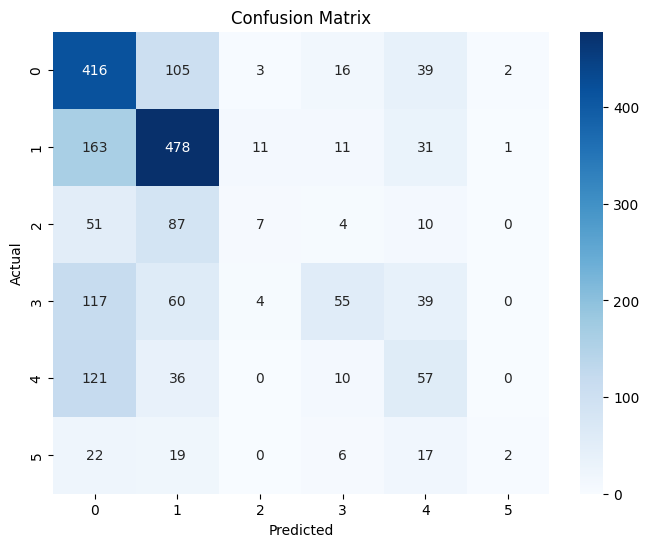

In [12]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.2 MB/s eta 0:00:00


In [ ]:
vocab_size = len(all_letters)  # Vocabulary size
classes = len(encoder.classes_) # Number of emotion classes
if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

  # Hyperparameters for training
learning_rate = 0.001  # Define your own learning rate
num_epochs = 30  # Number of epochs for training
num_layers = 3
hidden_nodes = 128  # Number of hidden nodes
D = 64 #Batch size
bidirectional = True

# Define the model architecture
a_rnn = nn.Sequential(
    nn.Embedding(vocab_size, D),  # (B, T) -> (B, T, D)
    nn.RNN(D, hidden_nodes, num_layers = 3, batch_first=True,bidirectional = True, dropout=0.2),  # (B, T, D) -> (B, T, D), (S, B, D)
    LastTimeStep(rnn_layers = 3,bidirectional = True),  # Reduce to (B, D)
    nn.Linear(hidden_nodes*2, classes),  # (B, D) -> (B, classes)
)

In [ ]:
import streamlit as st
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vocab_size = len(all_letters)
hidden_dim = 128
num_classes = len(encoder.classes_)
a_rnn.load_state_dict(torch.load("twelevemodel.pth", map_location=device))
a_rnn.eval()

# Streamlit UI
st.title("Emotion Detection App")
st.write("Enter a sentence below to predict the emotion.")

user_input = st.text_input("Type a sentence:")
if st.button("Predict Emotion"):
    if user_input:
        input_tensor = string2InputVec(user_input).to(device)
        with torch.no_grad():
            output = model(input_tensor)
            predicted_label = torch.argmax(output, dim=1).item()
            predicted_emotion = encoder.inverse_transform([predicted_label])[0]
        st.success(f"Predicted Emotion: **{predicted_emotion}**")

<ipython-input-17-06adfd2b7e43>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  a_rnn.load_state_dict(torch.load("twelevemodel.pth", map_location=device))
2025-02-02 10:09:

In [ ]:
streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py

SyntaxError: invalid syntax (<ipython-input-20-fabc432b94c1>, line 1)